## Robert Frost, meet Natural Language Processing

### Extract the data

In [1]:
# Dependencies to read the SQLite database
import pandas as pd
import sqlite3
from pprint import pprint

In [2]:
# Connect to the poetry database
conn = sqlite3.connect("Poetry.db")

# Load the data into a dataframe
df = pd.read_sql_query("select * from Frost;", conn)
conn.close()

# Print the dataframe
df.head()

,index,title,link,lines
0,0,October,https://www.poetryfoundation.org/poems/53084/o...,"O hushed October morning mild, Thy leaves have..."
1,1,"‘Out, Out—’",https://www.poetryfoundation.org/poems/53087/o...,The buzz saw snarled and rattled in the yard A...
2,2,Acquainted with the Night,https://www.poetryfoundation.org/poems/47548/a...,I have been one acquainted with the night. I h...
3,3,After Apple-Picking,https://www.poetryfoundation.org/poems/44259/a...,My long two-pointed ladder's sticking through ...
4,4,Birches,https://www.poetryfoundation.org/poems/44260/b...,When I see birches bend to left and right Acro...


In [3]:
# Choose the relevant columns
df1 = df[["title", "lines"]]

In [4]:
# Put all letters in lower case
df1["lines"] = df1["lines"].str.lower()

# Preview the dataframe
df1.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,lines
0,October,"o hushed october morning mild, thy leaves have..."
1,"‘Out, Out—’",the buzz saw snarled and rattled in the yard a...
2,Acquainted with the Night,i have been one acquainted with the night. i h...
3,After Apple-Picking,my long two-pointed ladder's sticking through ...
4,Birches,when i see birches bend to left and right acro...


### Transform the data

In [5]:
# Dependencies
import re, string

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rochiecuevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rochiecuevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rochiecuevas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Tokenise, Remove Stop Words, Lemmatise
Reference for lemmatisation: https://marcobonzanini.com/2015/01/26/stemming-lemmatisation-and-pos-tagging-with-python-and-nltk/

In [6]:
# Remove stop words from the list
stops = stopwords.words("english")
exclude = set(string.punctuation)

# Lemmatise the words in each list to retain their roots
lemmatiser = WordNetLemmatizer()

In [7]:
# Transform the poem in preparation for word counts
words_list = []
preprocessed_text = []
for poem in df1["lines"]:
    
    # Create a list of words per poem after the words are converted to lowercase    
    words = word_tokenize(poem)
    
    # Filter to remove stop words and punctuations    
    words2 = [word for word in words if word not in stops and word not in exclude]
    
    # Lemmatise each word (if it's a verb, convert to root verb)
    words3 = [lemmatiser.lemmatize(word, pos = "v") for word in words2]
    
    # Add the filtered list of words (representing each poem)
    words_list.append(words3)
    
    # Convert the list of strings back to one string
    words4 = " ".join(words3)
    
    # Add the filtered list of words (representing each poem)
    preprocessed_text.append(words4)

df1["tokens"] = words_list    
df1["filteredPoem"] = preprocessed_text
df1.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,lines,tokens,filteredPoem
0,October,"o hushed october morning mild, thy leaves have...","[hush, october, morning, mild, thy, leave, rip...",hush october morning mild thy leave ripen fall...
1,"‘Out, Out—’",the buzz saw snarled and rattled in the yard a...,"[buzz, saw, snarl, rattle, yard, make, dust, d...",buzz saw snarl rattle yard make dust drop stov...
2,Acquainted with the Night,i have been one acquainted with the night. i h...,"[one, acquaint, night, walk, rain—and, back, r...",one acquaint night walk rain—and back rain out...
3,After Apple-Picking,my long two-pointed ladder's sticking through ...,"[long, two-pointed, ladder, 's, stick, tree, t...",long two-pointed ladder 's stick tree toward h...
4,Birches,when i see birches bend to left and right acro...,"[see, birch, bend, leave, right, across, line,...",see birch bend leave right across line straigh...


In [8]:
# Create a function that counts the number of words in each poem
def word_count(word_list):
    return len(word_list)

In [9]:
# Determine the length of each filtered poem
lengths = []
for poem in df1["tokens"]:
    length = word_count(poem)
    lengths.append(length)

# Add the filtered poem lengths in the df
df1["poemLength"] = lengths
df1.head()

,title,lines,tokens,filteredPoem,poemLength
0,October,"o hushed october morning mild, thy leaves have...","[hush, october, morning, mild, thy, leave, rip...",hush october morning mild thy leave ripen fall...,83
1,"‘Out, Out—’",the buzz saw snarled and rattled in the yard a...,"[buzz, saw, snarl, rattle, yard, make, dust, d...",buzz saw snarl rattle yard make dust drop stov...,159
2,Acquainted with the Night,i have been one acquainted with the night. i h...,"[one, acquaint, night, walk, rain—and, back, r...",one acquaint night walk rain—and back rain out...,54
3,After Apple-Picking,my long two-pointed ladder's sticking through ...,"[long, two-pointed, ladder, 's, stick, tree, t...",long two-pointed ladder 's stick tree toward h...,142
4,Birches,when i see birches bend to left and right acro...,"[see, birch, bend, leave, right, across, line,...",see birch bend leave right across line straigh...,252


In [10]:
df1.shape

(37, 5)

In [11]:
# Longest and shortest poems
longest_poem = df1["poemLength"].max()
shortest_poem = df1["poemLength"].min()

for i in range(0, len(df1["poemLength"])):
    if df1["poemLength"][i] == longest_poem:
        print(f'Longest poem: {df1["title"][i]}; Filtered poem length: {df1["poemLength"][i]} words')
    if df1["poemLength"][i] == shortest_poem:
        print(f'Shortest poem: {df1["title"][i]}; Filtered poem length: {df1["poemLength"][i]} words')      

Shortest poem: Dust of Snow; Filtered poem length: 15 words
Longest poem: The Death of the Hired Man; Filtered poem length: 787 words


### Word importance
Source: https://stevenloria.com/tf-idf/

In [12]:
# Dependencies
import math
from textblob import TextBlob as tb

In [13]:
# Create a function that calculates term frequency
def tf(word, poem):
    return poem.words.count(word) / len(poem.words)

# Create a function that determines the number of documents that contain a certain word
def n_docs(word, poemlist):
    return sum(1 for poem in poemlist if word in poem.words)

# Create a function that determines the inverse document frequency (IDF)
# IDF = how common a word is among all the documents in poemlist
def idf(word, poemlist):
    return math.log(len(poemlist) / (1 + n_docs(word, poemlist)))

def tdidf(word, poem, poemlist):
    return tf(word, poem) * idf(word, poemlist)

In [14]:
# Create the poemlist from df["lines"]
poemlist = [tb(poem) for poem in df1["filteredPoem"]]
poemlist

[TextBlob("hush october morning mild thy leave ripen fall tomorrow ’ wind wild waste crow forest call tomorrow may form go hush october morning mild begin hours day slow make day seem us less brief hearts averse beguile beguile us way know release one leaf break day noon release another leaf one tree one far away retard sun gentle mist enchant land amethyst slow slow grapes ’ sake whose leave already burn frost whose cluster fruit must else lost— grapes ’ sake along wall"),
 TextBlob("buzz saw snarl rattle yard make dust drop stove-length stick wood sweet-scented stuff breeze draw across lift eye could count five mountain range one behind sunset far vermont saw snarl rattle snarl rattle run light bear load nothing happen day do call day wish might say please boy give half hour boy count much save work sister stand beside apron tell ‘ supper. ’ word saw prove saw know supper mean leap boy ’ hand seem leap— must give hand however neither refuse meet hand boy ’ first outcry rueful laugh s

In [15]:
# Create an empty list to be filled with text blobs from cleaning poemlist
poemlist2 = []

# Loop through the poemlist
for i in range(0, len(poemlist)):
    
    # Remove words that are shorter than 3 characters
    new_string = ' '.join([w for w in str(poemlist[i]).split() if len(w) > 3])
    
    # Replace emm dash with space
    new_string2 = new_string.replace("—", " ")
    
    # Convert string to text blob
    new_string2 = tb(new_string2)
    
    # Append the text blob to the list of text blobs
    poemlist2.append(new_string2)
    
poemlist2

[TextBlob("hush october morning mild leave ripen fall tomorrow wind wild waste crow forest call tomorrow form hush october morning mild begin hours slow make seem less brief hearts averse beguile beguile know release leaf break noon release another leaf tree away retard gentle mist enchant land amethyst slow slow grapes sake whose leave already burn frost whose cluster fruit must else lost  grapes sake along wall"),
 TextBlob("buzz snarl rattle yard make dust drop stove-length stick wood sweet-scented stuff breeze draw across lift could count five mountain range behind sunset vermont snarl rattle snarl rattle light bear load nothing happen call wish might please give half hour count much save work sister stand beside apron tell supper. word prove know supper mean leap hand seem leap  must give hand however neither refuse meet hand first outcry rueful laugh swing toward hold hand half appeal half keep life spill all  since enough know work though child heart  spoil hand off  doctor come

In [16]:
# Calculate the most important words
impt_words = []
for i, poem in enumerate(poemlist2):
    scores = {word: tdidf(word, poem, poemlist2) for word in poem.words}
    sorted_words = sorted(scores.items(), key = lambda x: x[1], reverse = True)
    
    for word, score in sorted_words[:5]:
        impt_words.append((i + 1, word, round(score, 5)))

In [17]:
# Create a dataframe of important words per poem
df2 = pd.DataFrame(impt_words, columns = ["PoemNo", "Word", "TF-IDF"])

# Add titles for each poem in df2
titles = []
for i in range(0, len(df)):
    for p in df2.PoemNo:
        if i == p - 1:
            title = df["title"][i]
            titles.append(title) 

df2["PoemTitle"] = titles

# Remove 
df2.head()

,PoemNo,Word,TF-IDF,PoemTitle
0,1,slow,0.11420,October
1,1,hush,0.08842,October
2,1,october,0.08842,October
3,1,mild,0.08842,October
4,1,beguile,0.08842,October


In [18]:
df3 = pd.DataFrame(df2.groupby(["PoemTitle", "Word"])["TF-IDF"].mean())
df3

TF-IDF
PoemTitle                 Word                  
Acquainted with the Night acquaint       0.12416
                          city           0.10691
                          furthest       0.06208
                          outwalked      0.06208
                          rain           0.10691
After Apple-Picking       apple-picking  0.04863
                          apples         0.09726
                          ladder         0.04863
                          sleep          0.09096
                          thousand       0.03708
Birches                   birch          0.04449
                          break          0.03063
                          climb          0.03337
                          learn          0.04377
                          swinger        0.02918
Christmas Trees           cents          0.04148
                          christmas      0.05953
                          city           0.03572
                          sell           0.04763
                          thousand       0.04217
Dust of Snow              crow           0.20936
                          dust           0.18539
                          hemlock        0.24315
                          mood           0.24315
                          part           0.18539
Fire and Ice              destruction    0.16210
                          favor          0.16210
                          fire           0.20213
                          perish         0.16210
                          taste          0.16210
...                                          ...
The Sound of Trees        noise          0.08973
                          shall          0.12994
                          suffer         0.05210
                          sway           0.08973
                          talk           0.07148
The Star-splitter         farm           0.05174
                          sell           0.03339
                          split          0.03339
                          star           0.04173
                          telescope      0.05816
The Tuft of Flowers       butterfly      0.04801
                          grass          0.05422
                          scythe         0.05422
                          together       0.05422
                          work           0.07200
The Wood-Pile             forget         0.04198
                          gray           0.04198
                          pile           0.04198
                          swamp          0.04198
                          year           0.05760
To E. T.                  dive           0.04945
                          half-read      0.04945
                          poems          0.04945
                          slumber        0.04945
                          tomb           0.04945
‘Out, Out—’               half           0.06229
                          hand           0.06015
                          rattle         0.06229
                          sister         0.04823
                          snarl          0.07234

[185 rows x 1 columns]

### Visualise the important words

In [19]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
import numpy as np

from ipywidgets import widgets, interactive

In [20]:
# Create a widget containing poem titles (sorted alphabetically)
titles = list(df.title)
titles.sort()

poem_title = widgets.Dropdown(options = ["Choose a poem..."] + titles, value = "Choose a poem...", 
                              description = "Title:", disabled = False)

In [21]:
# Create a filter based on title
def plot_it(poem_title):
    if poem_title != "Choose a poem...":
        df3 = df2[df2["PoemTitle"] == poem_title]
        
        plt.figure(figsize = (10, 6))
        sns.set(font_scale = 1.5)
        graph = sns.barplot(y = "Word", x = "TF-IDF", data = df3, palette = "Blues_d")

In [22]:
# Plot the data by poem title
interactive(plot_it, poem_title = poem_title)

interactive(children=(Dropdown(description='Title:', options=('Choose a poem...', 'Acquainted with the Night',…

### Topic Modelling
Sources: 
1. https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
2. https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [23]:
# Gensim 
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

warnings.filterwarnings("ignore", category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [24]:
tokens = df1["tokens"].tolist()

In [25]:
# Build the bigram and the trigram model
bigram = gensim.models.Phrases(tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens], threshold=100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [26]:
def process_words(texts, stop_words = stops, allowed_postags = ["NOUN", "ADJ", "VERB", "ADV"]):
    """ Remove stop words, create bigrams and trigrams, lemmatise """
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]    
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    nlp = spacy.load("en", disable = ["parser", "ner"])
    
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
        # remove stop words (again)         
        texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] \
                     for doc in texts_out]
        
        # remove words shorter than three letters       
        texts_out = [[word for word in lst if len(word) > 2] for lst in texts_out]

    
    return texts_out

In [27]:
filtered_text = process_words(tokens)

In [28]:
# Create dictionary
id2words = corpora.Dictionary(filtered_text)

# Create corpus term frequency (convert dictionary to bag-of-words)
corpus = [id2words.doc2bow(text) for text in filtered_text]

#### How many topics?

In [29]:
# Create a range of number of topics
num_topics = list(range(1, 11))
num_topics

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
# Define a function that calculates the coherence score 
def coherence_score(num_topics):
    """ Create a LDA model """
    lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2words,
                                            num_topics = num_topics,
                                            random_state = 100,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 20,
                                            alpha = "auto",
                                            per_word_topics = True)
    
    """ Calculate the coherence score """
    coherence_model_lda = CoherenceModel(model = lda_model, 
                                         texts = filtered_text, 
                                         dictionary = id2words,
                                         coherence = 'c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    return coherence_lda

In [31]:
# Calculate the coherence score of each number of topics
coh_score = [coherence_score(x) for x in num_topics]
coh_score

[0.31481940884156584,
 0.2593945875086378,
 0.2802668189118108,
 0.2815279415866194,
 0.29314277662560845,
 0.3308687997544482,
 0.30579766308916134,
 0.3168668414514355,
 0.30925521830275504,
 0.3386915436543478]

Text(0,0.5,'Coherence score')

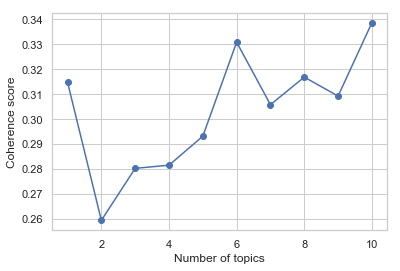

In [32]:
# Plot number of topics vs coherence score
# Find the highest coherence score before the trend flattens out
plt.plot(num_topics, coh_score, "bo-")
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")

In [33]:
# Building the LDA model using the chosen number of topics
final_number = 4

lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2words,
                                            num_topics = final_number,
                                            random_state = 100,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 20,
                                            alpha = "auto",
                                            per_word_topics = True)

# Compute Perplexity
print(f"Perplexity: {lda_model.log_perplexity(corpus)}")

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model, 
                                     texts = filtered_text, 
                                     dictionary = id2words, 
                                     coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_lda}")

Perplexity: -7.000299885786283
Coherence Score: 0.2815279415866194


In [34]:
# Keywords for the top 10 topics
doc_lda = lda_model[corpus]
pprint(lda_model.print_topics())

[(0,
  '0.012*"say" + 0.009*"star" + 0.008*"come" + 0.008*"house" + 0.008*"thing" + '
  '0.007*"know" + 0.007*"look" + 0.007*"good" + 0.007*"wood" + 0.007*"think"'),
 (1,
  '0.014*"make" + 0.013*"say" + 0.012*"see" + 0.012*"come" + 0.011*"think" + '
  '0.010*"know" + 0.007*"could" + 0.007*"back" + 0.007*"leave" + 0.007*"good"'),
 (2,
  '0.011*"could" + 0.011*"tree" + 0.009*"come" + 0.009*"hand" + 0.009*"give" + '
  '0.008*"say" + 0.008*"enough" + 0.008*"boy" + 0.008*"ask" + 0.007*"know"'),
 (3,
  '0.013*"come" + 0.008*"see" + 0.008*"say" + 0.008*"fall" + 0.007*"could" + '
  '0.007*"nothing" + 0.007*"house" + 0.007*"leave" + 0.007*"apple" + '
  '0.007*"sleep"')]


### Most important words per topic

In [35]:
# Dependencies
import pyLDAvis
import pyLDAvis.gensim

In [36]:
# Create graphs of most important words per topic
# Based on the LDA model

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda_model, corpus, id2words)
panel

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.049055 -0.069789       1        1  48.442261
0     -0.027391  0.098084       2        1  22.086555
3      0.107689 -0.011667       3        1  19.051088
2     -0.031243 -0.016628       4        1  10.420094, topic_info=     Category       Freq       Term      Total  loglift  logprob
term                                                            
59    Default   9.000000        boy   9.000000  30.0000  30.0000
466   Default   8.000000       star   8.000000  29.0000  29.0000
80    Default  15.000000       give  15.000000  28.0000  28.0000
358   Default  11.000000        ask  11.000000  27.0000  27.0000
82    Default  14.000000       hand  14.000000  26.0000  26.0000
47    Default  21.000000       tree  21.000000  25.0000  25.0000
75    Default   6.000000     enough   6.000000  24.0000  24.0000
65    Default  28.000000      could  28.000000  23.0000  23.0000
105   Default  12.000000    nothing  12.000000  22.0000  22.0000
154   Default  17.000000      house  17.000000  21.0000  21.0000
15    Default  13.000000       fall  13.000000  20.0000  20.0000
178   Default   7.000000      apple   7.000000  19.0000  19.0000
416   Default   5.000000       sell   5.000000  18.0000  18.0000
368   Default   4.000000  christmas   4.000000  17.0000  17.0000
91    Default  12.000000        let  12.000000  16.0000  16.0000
64    Default  44.000000       come  44.000000  15.0000  15.0000
84    Default   7.000000       hold   7.000000  14.0000  14.0000
855   Default   5.000000       blow   5.000000  13.0000  13.0000
146   Default   4.000000       city   4.000000  12.0000  12.0000
544   Default   7.000000       farm   7.000000  11.0000  11.0000
152   Default  20.000000       good  20.000000  10.0000  10.0000
228   Default   8.000000      sleep   8.000000   9.0000   9.0000
1278  Default   5.000000  telescope   5.000000   8.0000   8.0000
43    Default   9.000000       seem   9.000000   7.0000   7.0000
139   Default  15.000000       wood  15.000000   6.0000   6.0000
157   Default  23.000000       look  23.000000   5.0000   5.0000
355   Default  18.000000      would  18.000000   4.0000   4.0000
92    Default   9.000000        lie   9.000000   3.0000   3.0000
66    Default   5.000000      count   5.000000   2.0000   2.0000
934   Default   4.000000       none   4.000000   1.0000   1.0000
...       ...        ...        ...        ...      ...      ...
142    Topic4   1.242931       yard   2.533762   1.5492  -5.8281
416    Topic4   2.347668       sell   5.809765   1.3553  -5.1921
114    Topic4   1.242947     refuse   2.661700   1.5000  -5.8280
59     Topic4   3.453065        boy   9.982048   1.1999  -4.8063
358    Topic4   3.452778        ask  11.768402   1.0352  -4.8064
24     Topic4   1.795555       hour   4.758972   1.2867  -5.4602
82     Topic4   4.005547       hand  14.973427   0.9428  -4.6579
80     Topic4   4.005121       give  15.441038   0.9120  -4.6580
47     Topic4   4.557688       tree  21.480097   0.7111  -4.5287
84     Topic4   2.348845       hold   7.985906   1.0377  -5.1916
408    Topic4   1.795459    pasture   5.323640   1.1745  -5.4603
65     Topic4   4.558589      could  28.766272   0.4192  -4.5285
91     Topic4   2.901000        let  12.668756   0.7874  -4.9805
43     Topic4   2.347936       seem   9.441752   0.8698  -5.1920
355    Topic4   2.902595      would  18.819469   0.3921  -4.9799
64     Topic4   4.005688       come  44.506382  -0.1465  -4.6578
157    Topic4   2.901234       look  23.417082   0.1731  -4.9804
105    Topic4   2.348421    nothing  12.589254   0.5823  -5.1918
119    Topic4   3.456808        say  45.936989  -0.3255  -4.8052
27     Topic4   1.795724       leaf   6.144963   1.0312  -5.4601
87     Topic4   2.902921       know  30.795044  -0.1002  -4.9798
121    Topic4   2.901470        see  38.617123  -0.3270  -4.9803
339    Topic4   1.797243      think  33.601585  -0.6669  -

In [37]:
# Save the graph as a html page
pyLDAvis.save_html(panel, "lda.html")

### Dominant Topic in each abstract

In [40]:
def format_topics_sentences(doc_lda, ldamodel = lda_model, texts = tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(doc_lda):
        row = row_list[0] if ldamodel.per_word_topics else row_list 
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), \
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(doc_lda, ldamodel = lda_model, texts = tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9989,"make, say, see, come, think, know, could, back...","[hush, october, morning, mild, thy, leave, rip..."
1,1,2.0,0.9993,"could, tree, come, hand, give, say, enough, bo...","[buzz, saw, snarl, rattle, yard, make, dust, d..."
2,2,0.0,0.9982,"say, star, come, house, thing, know, look, goo...","[one, acquaint, night, walk, rain—and, back, r..."
3,3,3.0,0.9993,"come, see, say, fall, could, nothing, house, l...","[long, two-pointed, ladder, 's, stick, tree, t..."
4,4,1.0,0.9996,"make, say, see, come, think, know, could, back...","[see, birch, bend, leave, right, across, line,..."
5,5,2.0,0.9995,"could, tree, come, hand, give, say, enough, bo...","[city, withdraw, leave, last, country, country..."
6,6,0.0,0.9943,"say, star, come, house, thing, know, look, goo...","[way, crow, shake, dust, snow, hemlock, tree, ..."
7,7,3.0,0.9964,"come, see, say, fall, could, nothing, house, l...","[say, world, end, fire, say, ice, ’, taste, de..."
8,8,0.0,0.9967,"say, star, come, house, thing, know, look, goo...","[come, real, star, fill, upper, sky, earth, co..."
9,9,3.0,0.9985,"come, see, say, fall, could, nothing, house, l...","[others, taunt, kneel, well-curbs, always, wro..."


### Data Visualisation

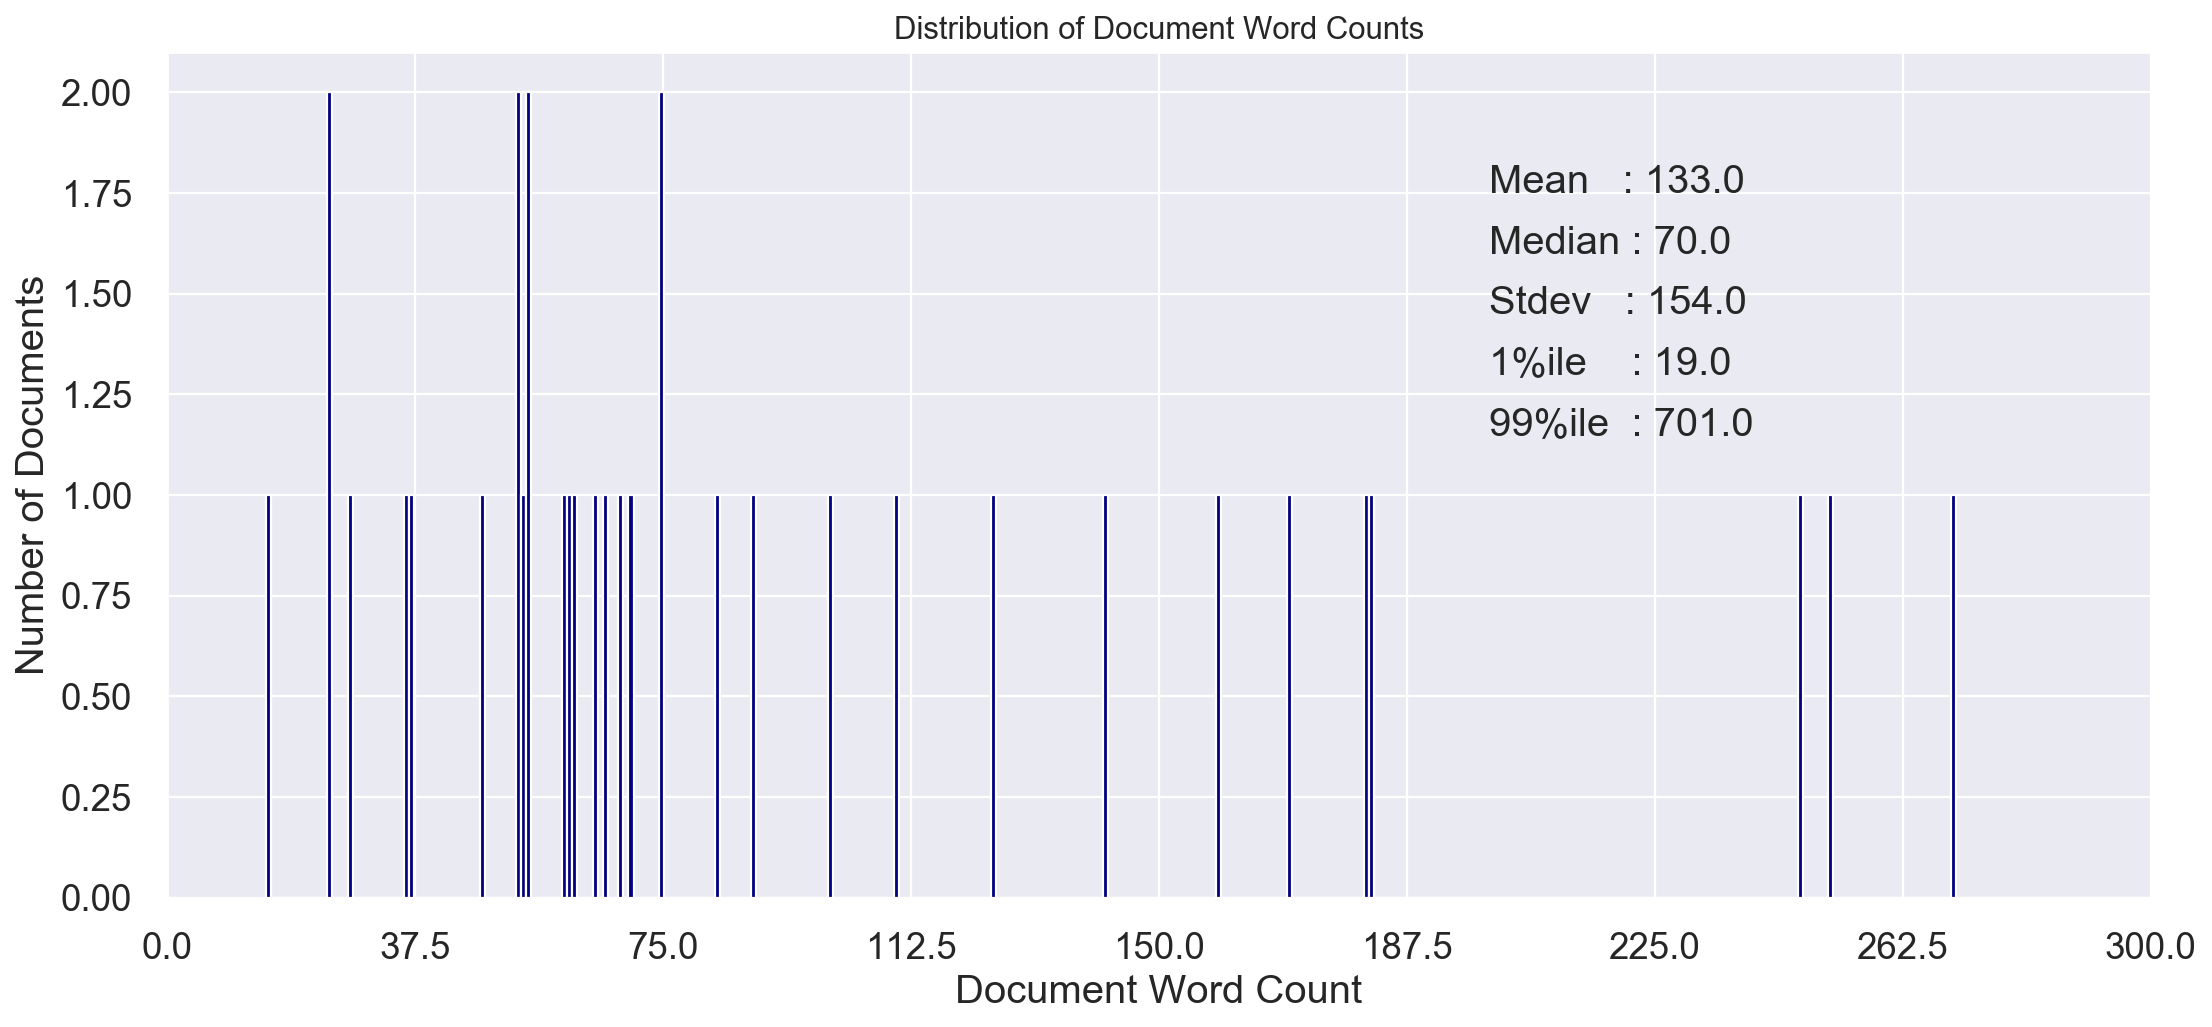

In [48]:
# Length of text per tokenised abstract
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize = (16,7), dpi = 160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(200, 1.75, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(200, 1.60, "Median : " + str(round(np.median(doc_lens))))
plt.text(200, 1.45, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(200, 1.30, "1%ile    : " + str(round(np.quantile(doc_lens, q = 0.01))))
plt.text(200, 1.15, "99%ile  : " + str(round(np.quantile(doc_lens, q = 0.99))))

plt.gca().set(xlim = (0, 300), ylabel = 'Number of Documents', xlabel = 'Document Word Count')
plt.tick_params(size = 12)
plt.xticks(np.linspace(0, 300, 9))
plt.title('Distribution of Document Word Counts', fontdict = dict(size = 14))
plt.show()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


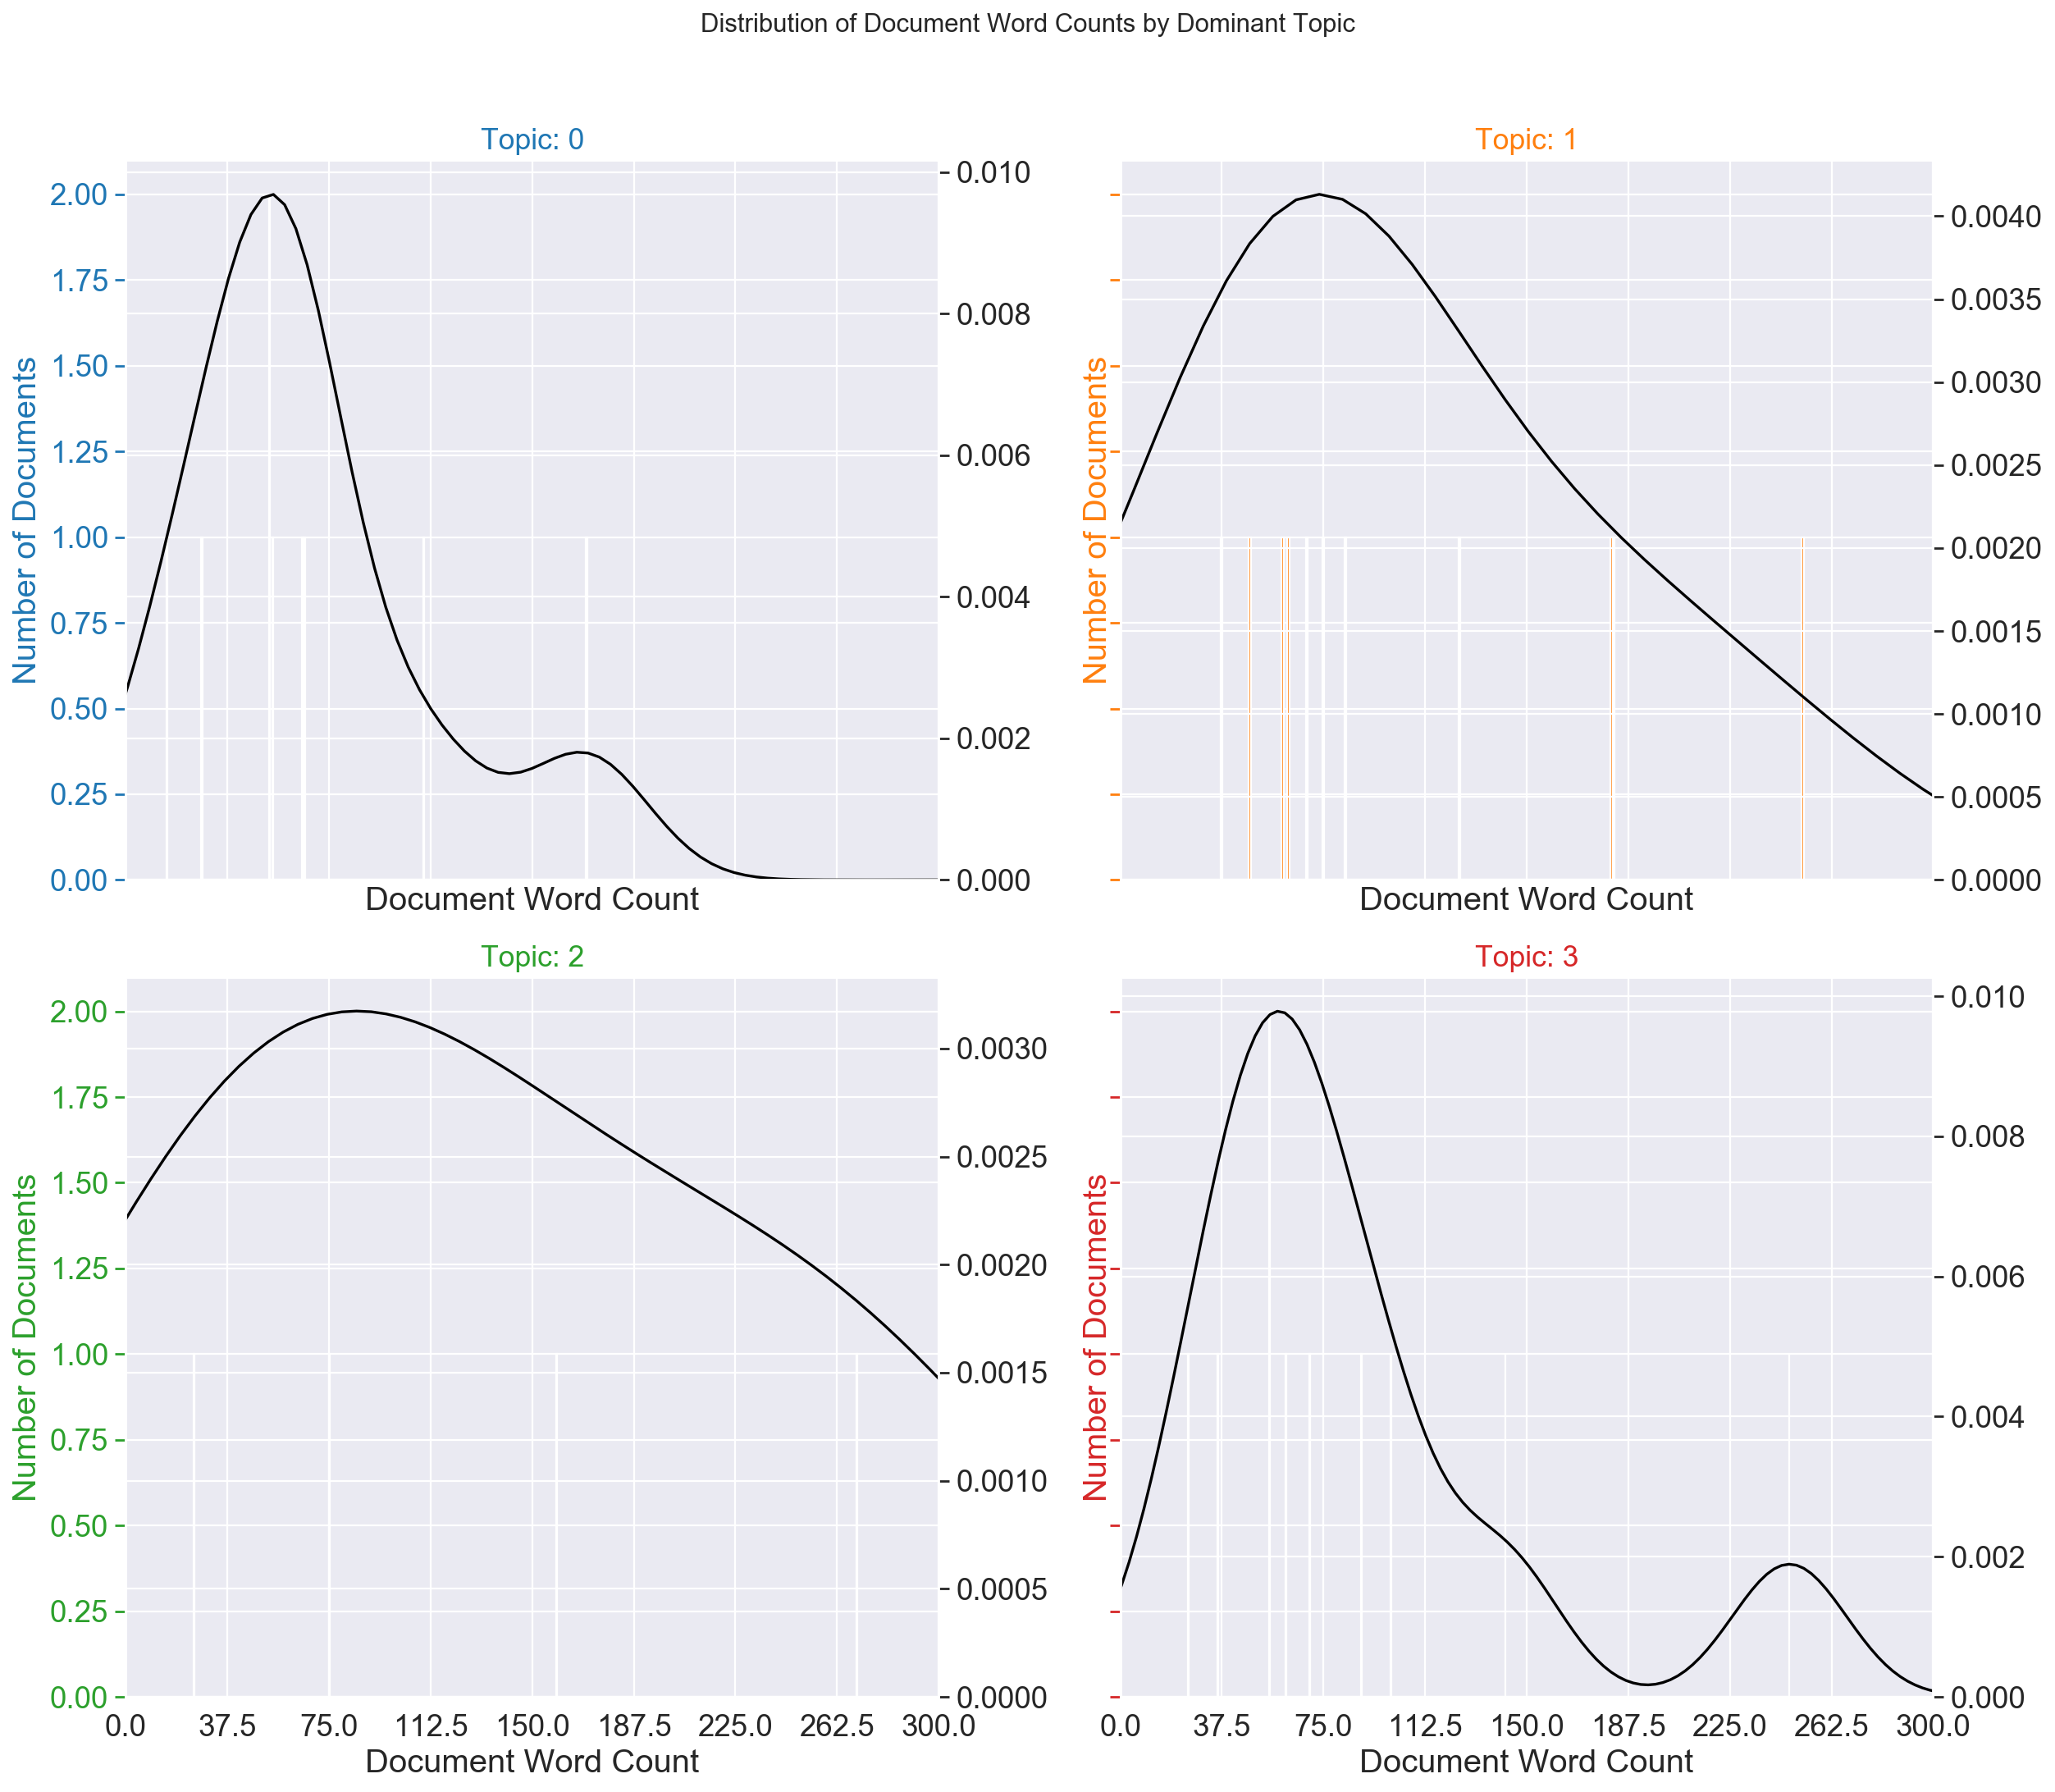

In [49]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2, figsize = (16,14), dpi = 160, sharex = True, sharey = True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color = cols[i])
    ax.tick_params(axis = 'y', labelcolor = cols[i], color = cols[i])
    sns.kdeplot(doc_lens, color = "black", shade = False, ax = ax.twinx())
    ax.set(xlim = (0, 300), xlabel = 'Document Word Count')
    ax.set_ylabel('Number of Documents', color = cols[i])
    ax.set_title('Topic: '+str(i), fontdict = dict(size = 16, color = cols[i]))

fig.tight_layout()
fig.subplots_adjust(top = 0.90)
plt.xticks(np.linspace(0, 300, 9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize = 14)
plt.show()

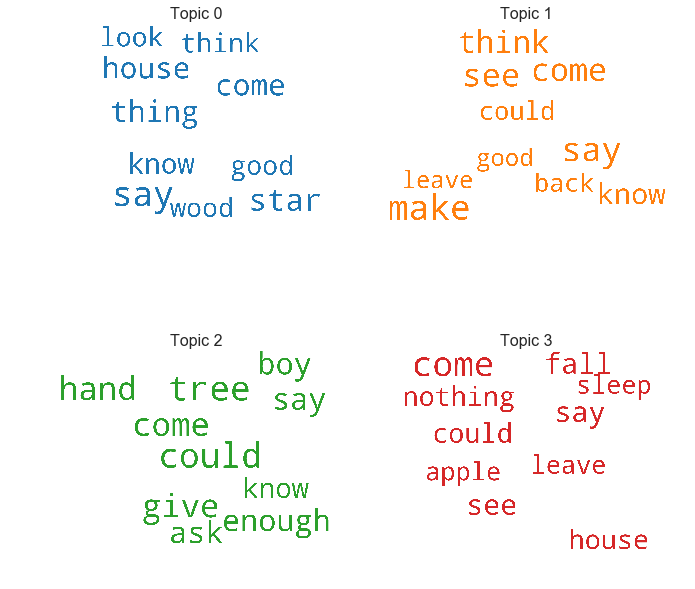

In [50]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords = stops,
                  background_color = 'white',
                  width = 2500,
                  height = 1800,
                  max_words = 10,
                  colormap = 'tab10',
                  color_func = lambda *args, **kwargs: cols[i],
                  prefer_horizontal = 1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize = (10,10), sharex = True, sharey = True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size = 300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size = 16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace = 0, hspace = 0)
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.tight_layout()
plt.show()

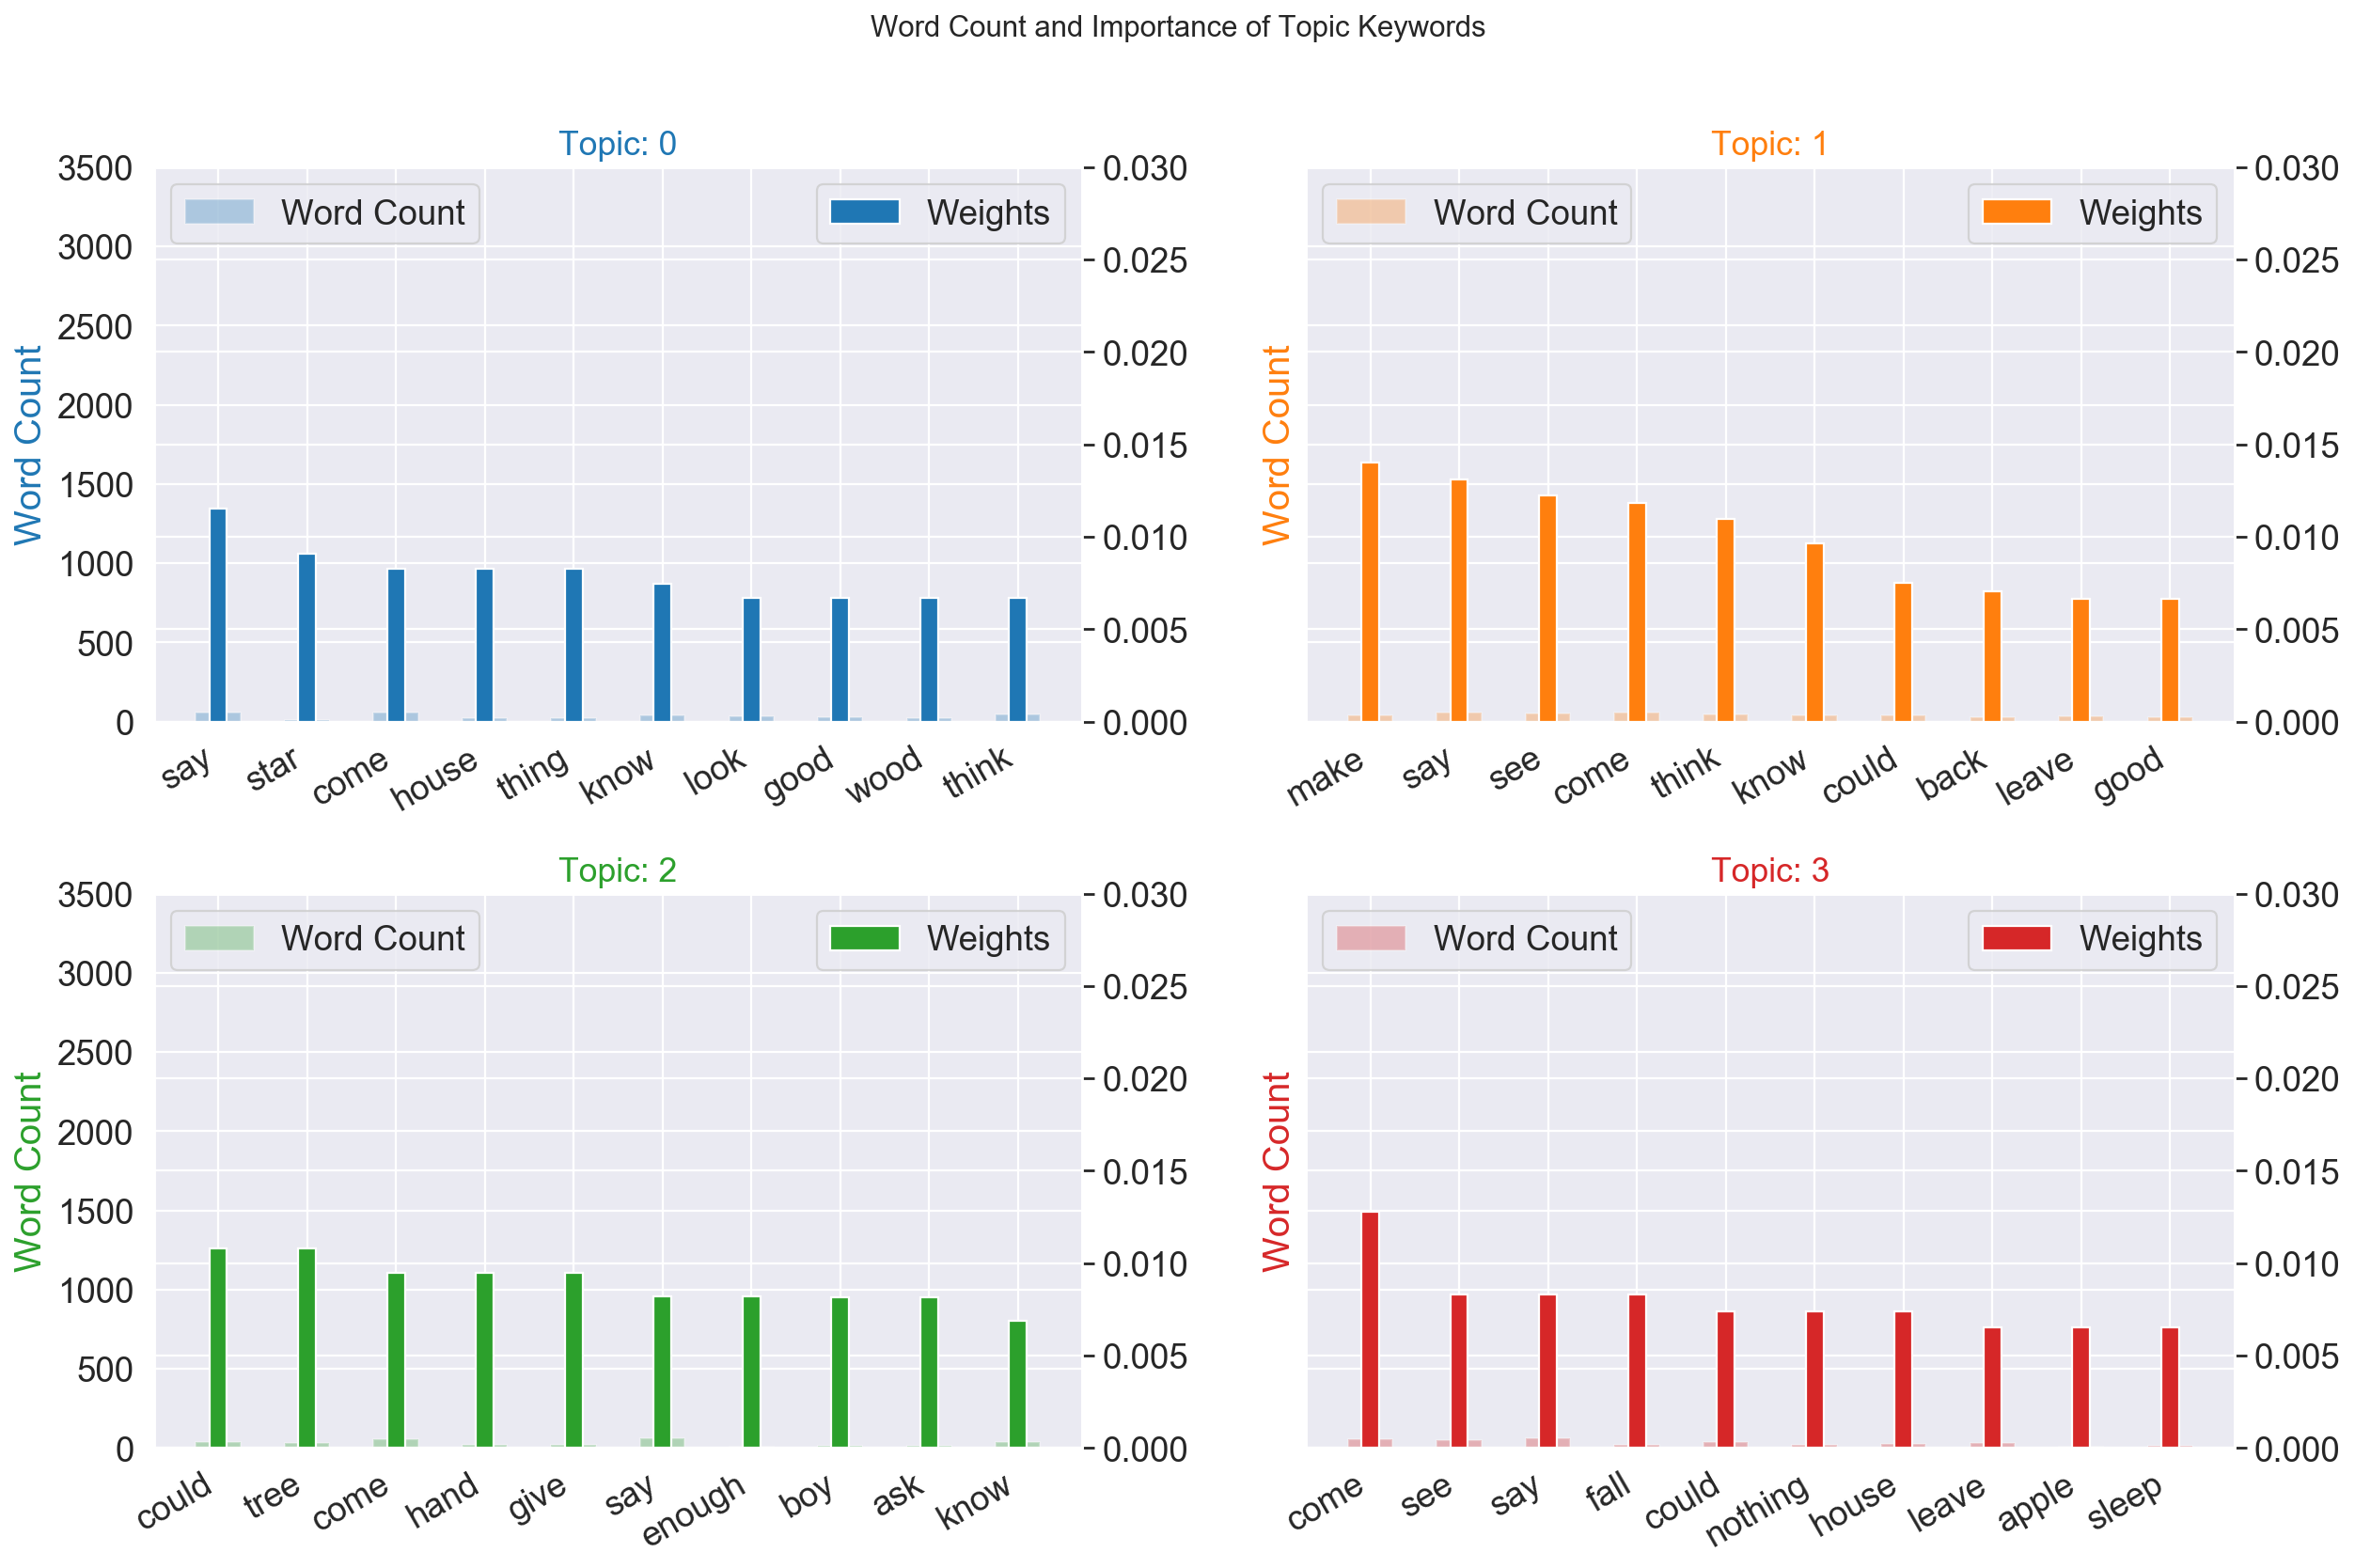

In [51]:
from collections import Counter
topics = lda_model.show_topics(formatted = False)
data_flat = [w for w_list in filtered_text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize = (16,10), sharey = True, dpi = 160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x = 'word', 
           height = "word_count", 
           data = df.loc[df.topic_id == i, :], 
           color = cols[i], 
           width = 0.5, 
           alpha = 0.3, 
           label = 'Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x = 'word', 
                height = "importance", 
                data = df.loc[df.topic_id == i, :], 
                color = cols[i], width = 0.2,
                label ='Weights')
    ax.set_ylabel('Word Count', color = cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color = cols[i], fontsize = 16)
    ax.tick_params(axis = 'y', left = False)
    ax.set_xticklabels(df.loc[df.topic_id == i, 'word'], 
                       rotation = 30, 
                       horizontalalignment = 'right')
    ax.legend(loc ='upper left')
    ax_twin.legend(loc = 'upper right')

fig.tight_layout(w_pad = 2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize = 14, y = 1.05)    
plt.show()

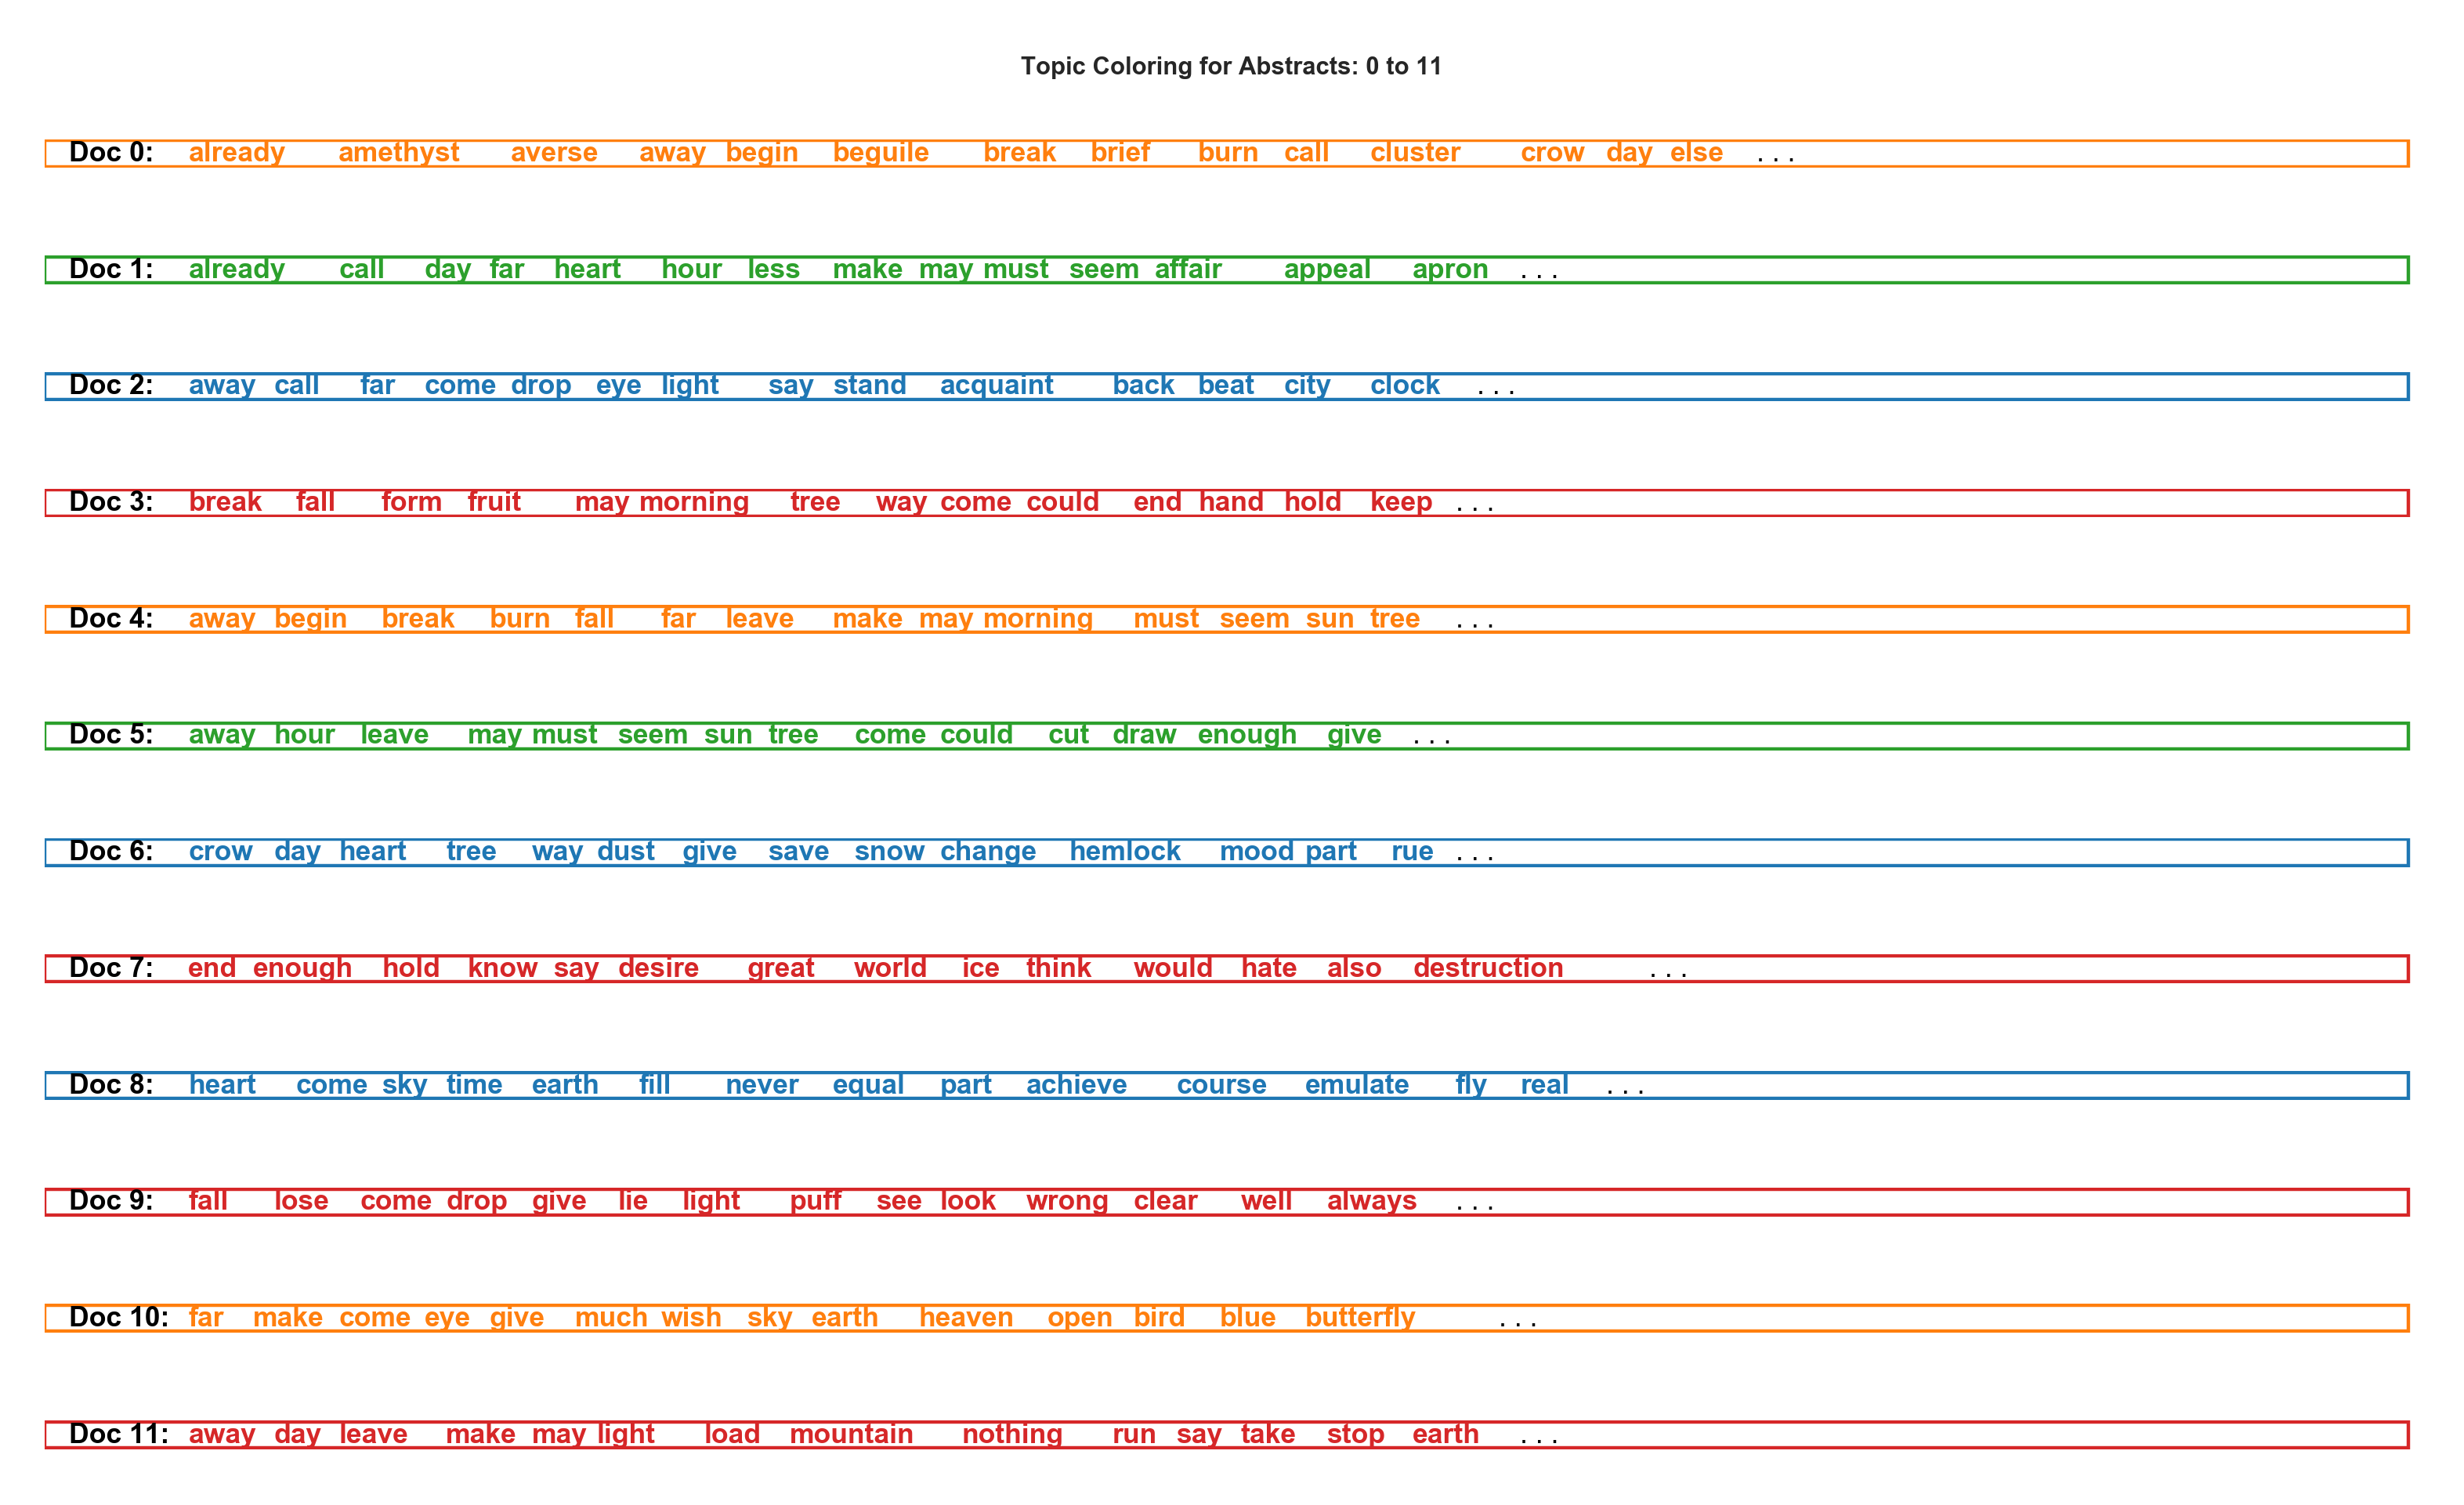

In [52]:
# Word colouring of N abstracts
from matplotlib.patches import Rectangle

def sentences_chart(lda_model = lda_model, corpus = corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment = 'center',
                    fontsize = 16, color = 'black', transform = ax.transAxes, fontweight = 700)

            # Draw Rectangle
            topic_percs_sorted = sorted(topic_percs, key = lambda x: (x[1]), reverse = True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill = None, alpha = 1, 
                                   color = mycolors[topic_percs_sorted[0][0]], linewidth = 2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment = 'left',
                            verticalalignment = 'center',
                            fontsize = 16, 
                            color = mycolors[topics],
                            transform = ax.transAxes, 
                            fontweight = 700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment = 'left',
                    verticalalignment = 'center',
                    fontsize = 16, 
                    color = 'black',
                    transform = ax.transAxes)       

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.suptitle('Topic Coloring for Abstracts: ' + str(start) + ' to ' + str(end-2), \
                 fontsize = 14, y = 0.95, fontweight = 700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [53]:
# Word colouring in N Abstracts
def topics_per_document(model, corpus, start = 0, end = 1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse = True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model = lda_model, corpus = corpus, end = -1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns = ['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name = 'count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name = 'count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted = False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns = ['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level =0,inplace = True)

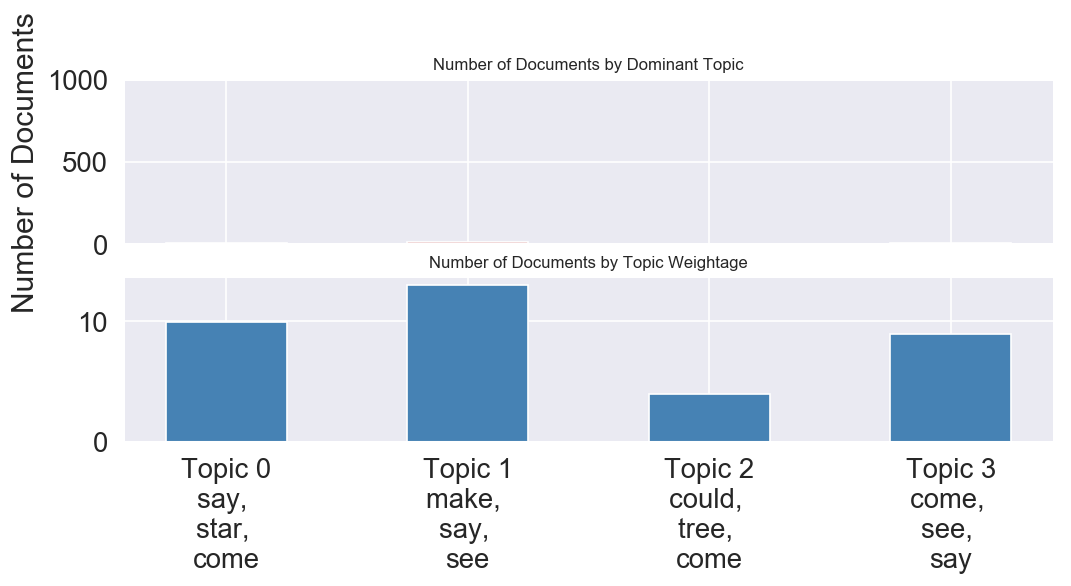

In [54]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 4), dpi = 120, sharex = True)

# Topic Distribution by Dominant Topics
ax1.bar(x = 'Dominant_Topic', 
        height = 'count', 
        data = df_dominant_topic_in_each_doc, 
        width = .5, color = 'firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + \
                               df_top3words.loc[df_top3words.topic_id == x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size = 10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x = 'index', 
        height = 'count', 
        data = df_topic_weightage_by_doc, 
        width = .5, color = 'steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict = dict(size = 10))

plt.show()